### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

### Load Datasets


In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Merge Datasets
merged_data = transactions.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count'],  # Total spend, average transaction value, number of transactions
}).reset_index()
merged_data.columns = ['CustomerID', 'Total_Spend', 'Avg_Transaction_Value', 'Num_Transactions']

customer_data = pd.merge(customers, merged_data, on='CustomerID', how='left').fillna(0)


### Feature Selection


In [4]:
features = ['Total_Spend', 'Avg_Transaction_Value', 'Num_Transactions']
X = customer_data[features]
X = X.dropna()  # Remove missing values
X = X.select_dtypes(include=['number']) 


In [5]:
# Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Determine Optimal Clusters using Elbow Method

In [6]:
#!pip install --upgrade --force-reinstall scikit-learn



  Using cached scikit_learn-1.6.1-cp39-cp39-win_amd64.whl (11.2 MB)
  Using cached numpy-2.0.2-cp39-cp39-win_amd64.whl (15.9 MB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl (46.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Acer\\anaconda3\\Lib\\site-packages\\~2mpy\\.libs\\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [8]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

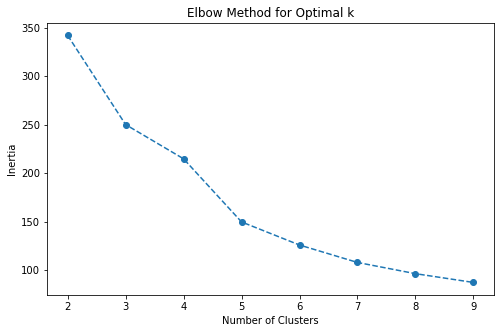

In [9]:
inertia = []
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

### Test different algorithms


In [48]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluate_clustering(X_scaled, labels):
    sil_score = silhouette_score(X_scaled, labels)
    db_index = davies_bouldin_score(X_scaled, labels)
    return sil_score, db_index

# Test different algorithms
results = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    sil, db = evaluate_clustering(X_scaled, labels)
    results[k] = {'Silhouette': sil, 'DB Index': db}
    print(f'k={k}: Silhouette Score={sil:.4f}, DB Index={db:.4f}')
    
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=6)
customer_data['Agglo_Cluster'] = agglo.fit_predict(X_scaled)
sil, db = evaluate_clustering(X_scaled, customer_data['Agglo_Cluster'])
print(f'Agglomerative: Silhouette Score={sil:.4f}, DB Index={db:.4f}')

# DBSCAN (Auto-tune EPS value)
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_data['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
dbscan_sil, dbscan_db = evaluate_clustering(X_scaled, customer_data['DBSCAN_Cluster'])
print(f'DBSCAN: Silhouette Score={dbscan_sil:.4f}, DB Index={dbscan_db:.4f}')


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

k=2: Silhouette Score=0.3804, DB Index=1.0025
k=3: Silhouette Score=0.3572, DB Index=0.9602
k=4: Silhouette Score=0.2999, DB Index=1.0742
k=5: Silhouette Score=0.3678, DB Index=0.8381
k=6: Silhouette Score=0.3709, DB Index=0.8378
k=7: Silhouette Score=0.3426, DB Index=0.8576
k=8: Silhouette Score=0.3449, DB Index=0.9242
k=9: Silhouette Score=0.3423, DB Index=0.8751
Agglomerative: Silhouette Score=0.2834, DB Index=0.9317
DBSCAN: Silhouette Score=-0.0751, DB Index=3.6435


### Apply K-Means Clustering with k=6


In [49]:
optimal_k = 6  # Updated based on your choice
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
customer_data['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Evaluate Clustering


In [50]:
sil_score = silhouette_score(X_scaled, customer_data['Cluster'])
db_index = davies_bouldin_score(X_scaled, customer_data['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')
print(f'Davies-Bouldin Index: {db_index:.4f}')

Silhouette Score: 0.3709
Davies-Bouldin Index: 0.8378


### Visualize Clusters using PCA


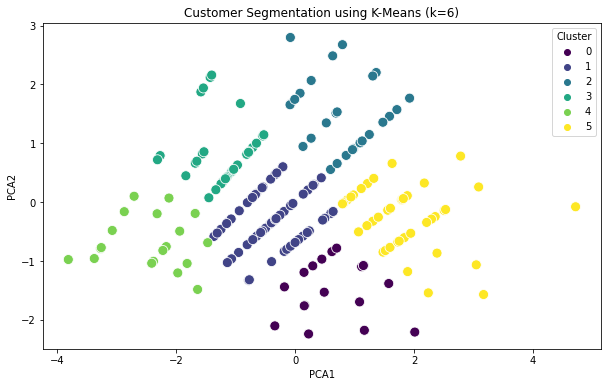

In [51]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
customer_data['PCA1'] = X_pca[:, 0]
customer_data['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title(f'Customer Segmentation using K-Means (k={optimal_k})')
plt.show()


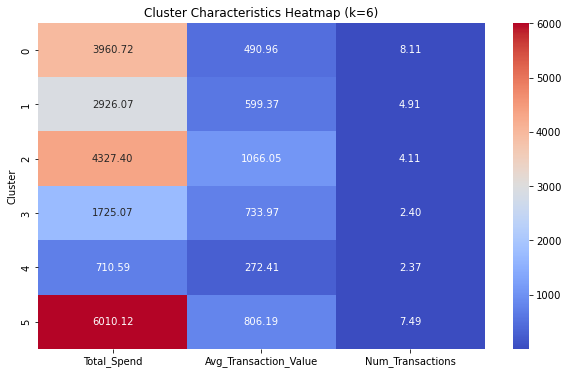

In [52]:
# Heatmap of Cluster Characteristics
cluster_means = customer_data.groupby('Cluster')[features].mean()
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Cluster Characteristics Heatmap (k={optimal_k})')
plt.show()

In [53]:
# Save Segmented Data
customer_data.to_csv('Segmented_Customers.csv', index=False)
